# Week 2 Exercises

In [64]:
import urllib.request
import pandas as pd
from io import StringIO

#Data 1
url1 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv'
response = urllib.request.urlopen(url1)
tsv_data = response.read().decode('utf-8')

tsv_file = StringIO(tsv_data)
data1 = pd.read_csv(tsv_file, sep='\t', header = None)

#Data 2
url2 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv'
response = urllib.request.urlopen(url2)
tsv_data = response.read().decode('utf-8')

tsv_file = StringIO(tsv_data)
data2 = pd.read_csv(tsv_file, sep='\t', header = None)

#Data 3
url3 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv'
response = urllib.request.urlopen(url3)
tsv_data = response.read().decode('utf-8')

tsv_file = StringIO(tsv_data)
data3 = pd.read_csv(tsv_file, sep='\t', header = None)

#Data 4
url4 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv'
response = urllib.request.urlopen(url4)
tsv_data = response.read().decode('utf-8')

tsv_file = StringIO(tsv_data)
data4 = pd.read_csv(tsv_file, sep='\t', header = None)
print(data2.iloc[:,0])


0     10
1      8
2     13
3      9
4     11
5     14
6      6
7      4
8     12
9      7
10     5
Name: 0, dtype: int64


In [65]:
import urllib.request
import pandas as pd
from io import StringIO


urls = [
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv',
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv',
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv',
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv'
]

datasets = []
for url in urls:
    response = urllib.request.urlopen(url)
    tsv_data = response.read().decode('utf-8')

    tsv_file = StringIO(tsv_data)
    data = pd.read_csv(tsv_file, sep='\t', header = None)
    datasets.append(data)
    
print(datasets[0].head())

    0     1
0  10  8.04
1   8  6.95
2  13  7.58
3   9  8.81
4  11  8.33


## Exercise 1
Exploring the data in the 4 tsv files above

### Means, variances and correlations

In [66]:
import numpy as np

x_means = []
y_means = []
x_vars = []
y_vars = []
i = 1
for data in datasets:
    x_mean = np.mean(data.iloc[:,0])
    y_mean = np.mean(data.iloc[:,1])
    x_var = np.var(data.iloc[:,0])
    y_var = np.var(data.iloc[:,1])
    x_means.append(x_mean)
    y_means.append(y_mean)
    x_vars.append(x_var)
    y_vars.append(y_var)
    print("X mean for dataset",i,": ", "{:5.2f}".format(x_mean))
    print("Y mean for dataset",i,": ", "{:5.2f}".format(y_mean))
    print("X variance for dataset",i,": ", "{:5.3f}".format(x_var))
    print("Y variance for dataset",i,": ", "{:5.3f}".format(y_var))
    
    
    corr = np.corrcoef(data.iloc[:,0],data.iloc[:,1])
    print("Correlation for dataset", i, ": ", "{:5.3f}".format(corr[0,1]), "and", "{:5.3f}".format(corr[1,0]))
    i+=1



X mean for dataset 1 :   9.00
Y mean for dataset 1 :   7.50
X variance for dataset 1 :  10.000
Y variance for dataset 1 :  3.752
Correlation for dataset 1 :  0.816 and 0.816
X mean for dataset 2 :   9.00
Y mean for dataset 2 :   7.50
X variance for dataset 2 :  10.000
Y variance for dataset 2 :  3.752
Correlation for dataset 2 :  0.816 and 0.816
X mean for dataset 3 :   9.00
Y mean for dataset 3 :   7.50
X variance for dataset 3 :  10.000
Y variance for dataset 3 :  3.748
Correlation for dataset 3 :  0.816 and 0.816
X mean for dataset 4 :   9.00
Y mean for dataset 4 :   7.50
X variance for dataset 4 :  10.000
Y variance for dataset 4 :  3.748
Correlation for dataset 4 :  0.817 and 0.817


### Linear Regression

In [67]:
from scipy import stats
i = 1
a_values = []
b_values = []
lines = []
for data in datasets:
    a, b, r_value, p_value, std_err = stats.linregress(data.iloc[:,0],data.iloc[:,1])
    a_values.append(a)
    b_values.append(b)
    line = a*data.iloc[:,0]+b
    lines.append(line)
    print("Data", i, ": ", "{:5.2f}".format(a), "*x +", "{:5.2f}".format(b))
    i+=1

Data 1 :   0.50 *x +  3.00
Data 2 :   0.50 *x +  3.00
Data 3 :   0.50 *x +  3.00
Data 4 :   0.50 *x +  3.00


The datasets all seem to have values that are either the same or very close to each other. 
Their correlations seem to be very high as well, showing that the values must be correlated somehow. 

### Plotting

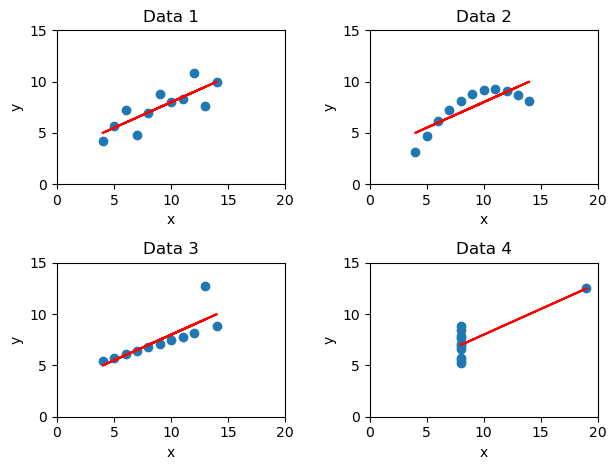

In [68]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2)
axes[0,0].scatter(datasets[0].iloc[:,0],datasets[0].iloc[:,1])
axes[0,0].plot(datasets[0].iloc[:,0],lines[0],color='red')
axes[0,0].set_title("Data 1")

axes[0,1].scatter(datasets[1].iloc[:,0],datasets[1].iloc[:,1])
axes[0,1].plot(datasets[1].iloc[:,0],lines[1],color='red')
axes[0,1].set_title("Data 2")

axes[1,0].scatter(datasets[2].iloc[:,0],datasets[2].iloc[:,1])
axes[1,0].plot(datasets[2].iloc[:,0],lines[2],color='red')
axes[1,0].set_title("Data 3")

axes[1,1].scatter(datasets[3].iloc[:,0],datasets[3].iloc[:,1])
axes[1,1].plot(datasets[3].iloc[:,0],lines[3],color='red')
axes[1,1].set_title("Data 4")

for row in axes:
    for ax in row:
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_xlim(0,20)
        ax.set_ylim(0,15)
plt.tight_layout()
plt.show()

Even though the values themselves are different, the conclusion can be the same? Since the all the values we've calculated are the same (more or less). It shows how different the datasets actually are when you plot them in a graph. 

## Exercise 2

In [69]:
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
#print(data.head())

C:\Users\maxhb\AppData\Local\Temp\ipykernel_42428\3920027740.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")


### Day of the week

DayOfWeek
Friday       252817
Wednesday    243715
Saturday     240984
Thursday     236738
Tuesday      236472
Monday       229996
Sunday       221422
Name: count, dtype: int64


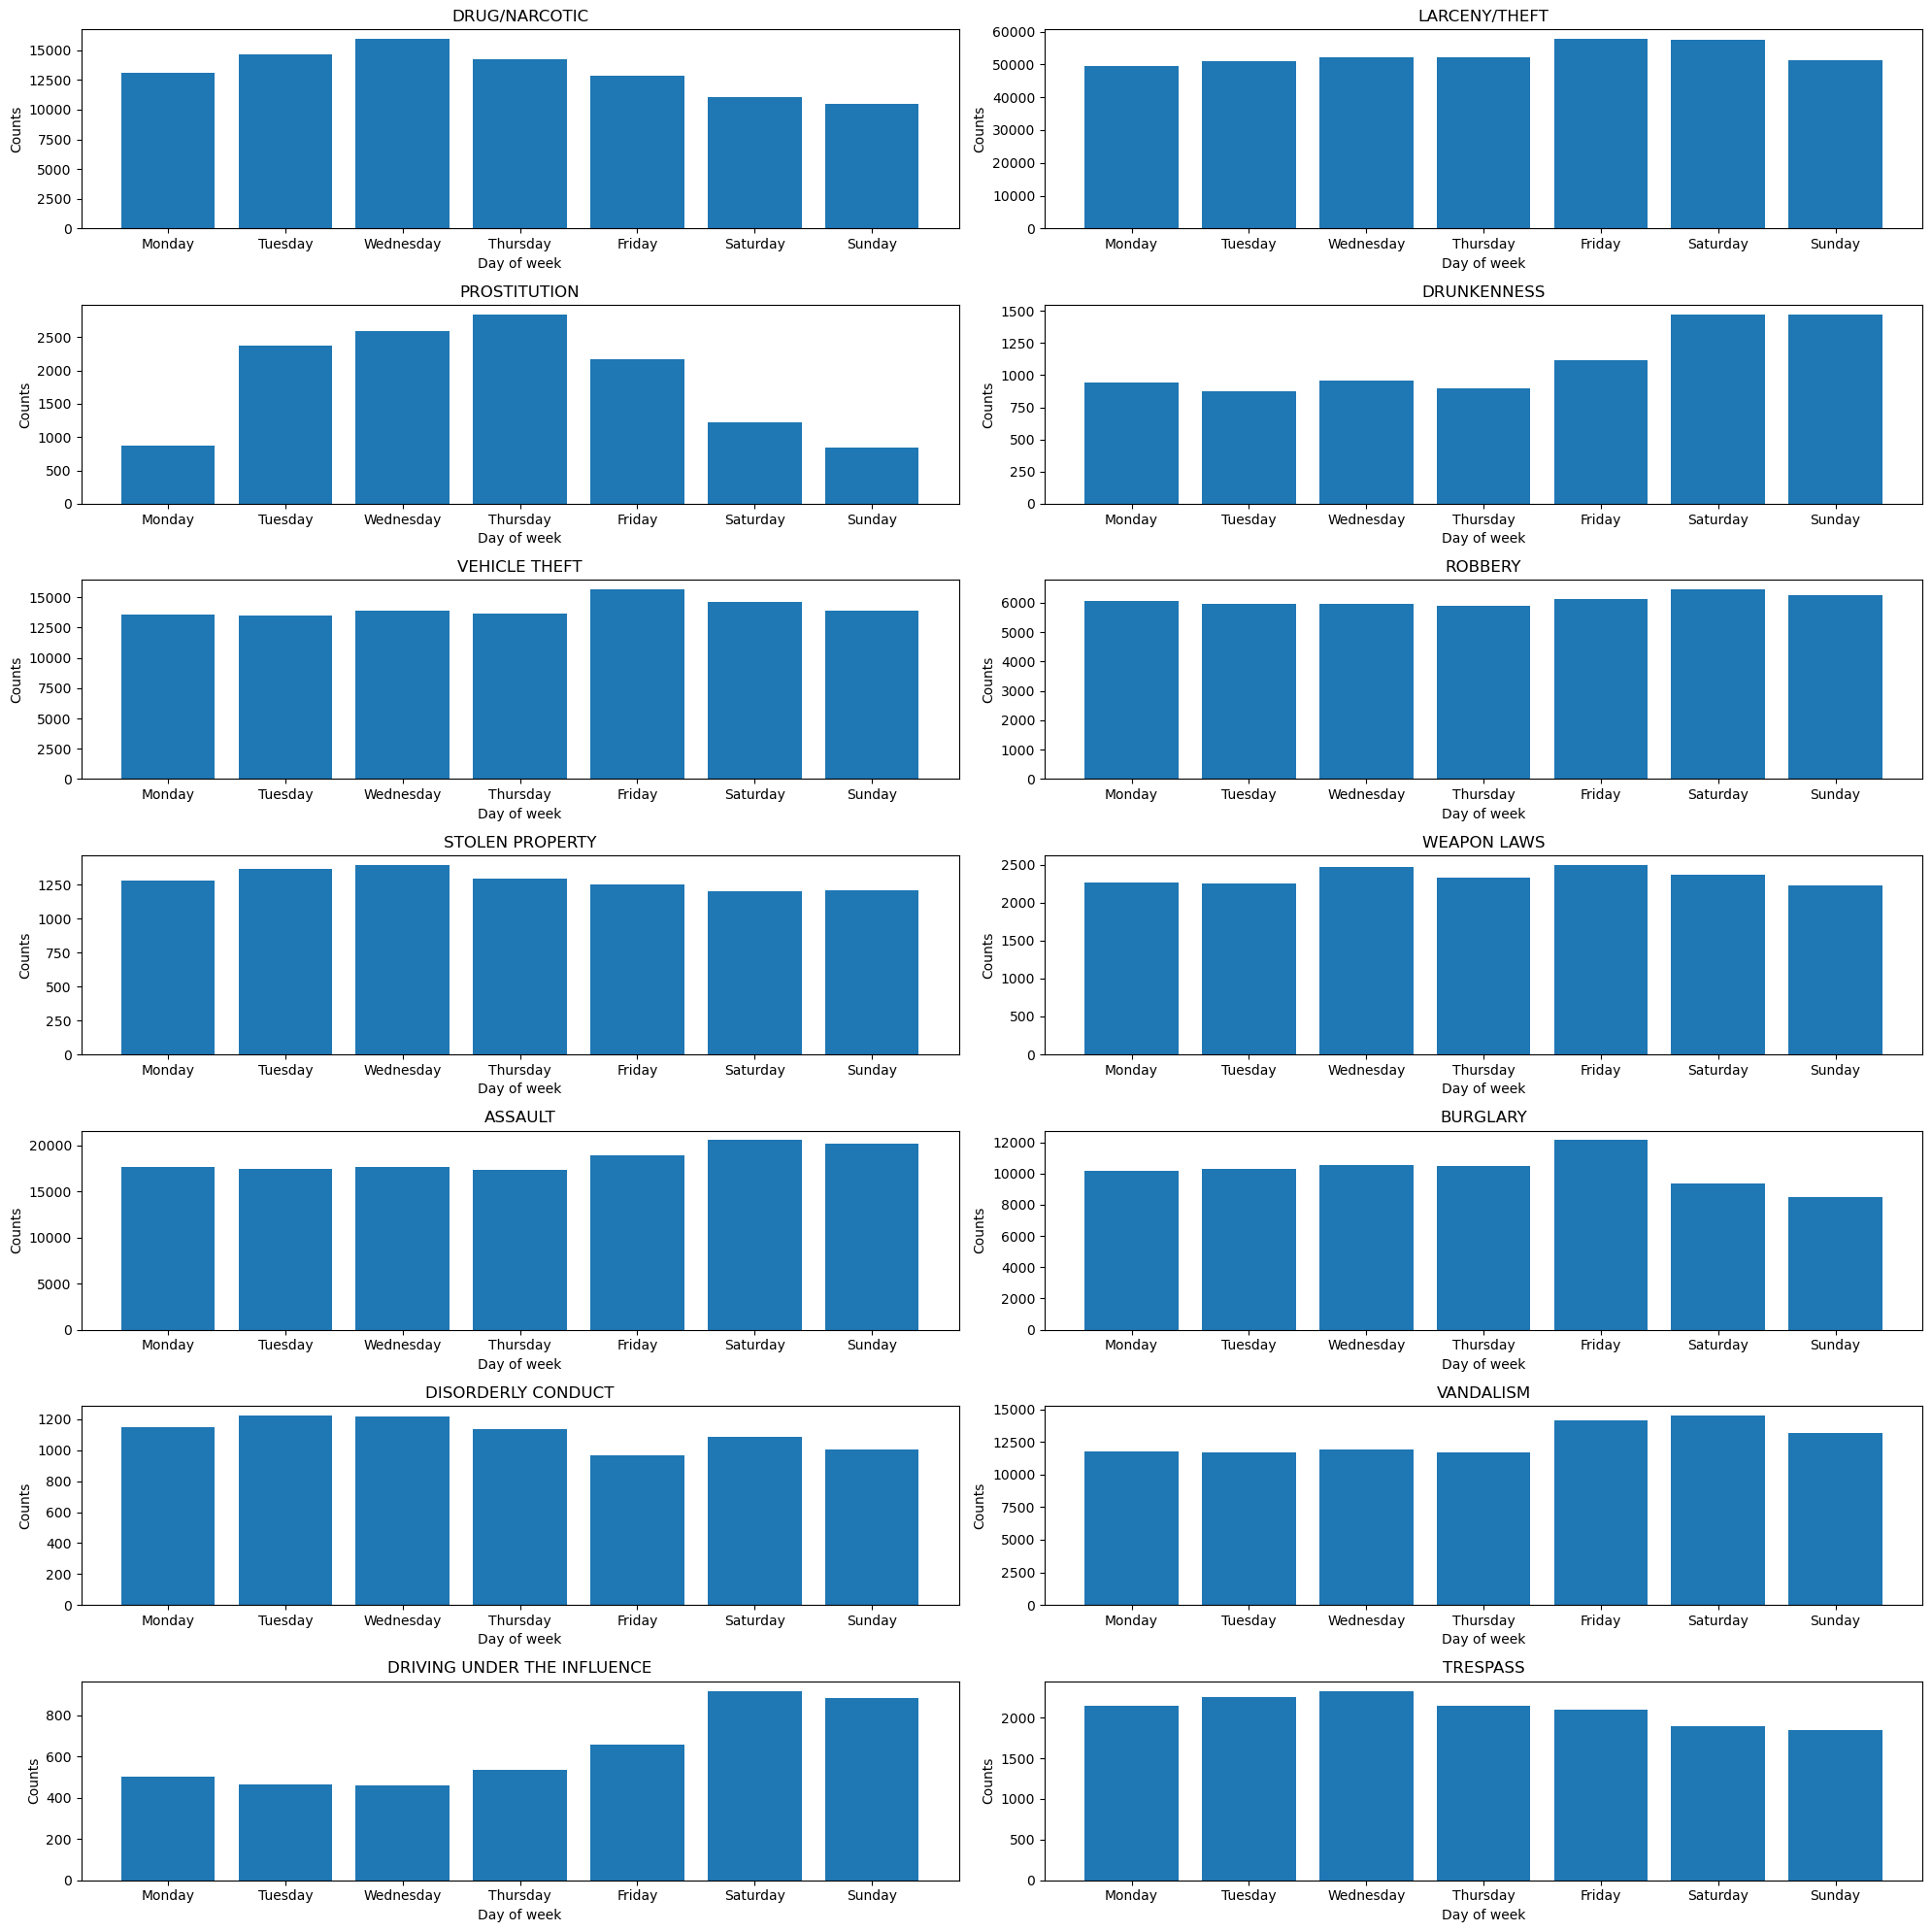

In [70]:
from pandas.api.types import CategoricalDtype


day_order = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
cat_type = CategoricalDtype(categories=day_order, ordered=True)
data["DayOfWeek"] = data["DayOfWeek"].astype(cat_type)


day_counts = data["DayOfWeek"].value_counts()
print(day_counts)
nrows = 7
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
axes = axes.flatten()

for i,crime in enumerate(focuscrimes):
    crime_data = data[data["Category"] == crime]
    crime_day_counts = crime_data["DayOfWeek"].value_counts().sort_index()
    
    axes[i].bar(crime_day_counts.index,crime_day_counts.values)
    axes[i].set_title(crime)
    axes[i].set_xlabel("Day of week")
    axes[i].set_ylabel("Counts")

plt.tight_layout()
plt.show()



### Months

Date
March        150372
January      148326
October      144883
April        139989
August       138338
May          137516
September    136823
July         136424
February     136116
November     133025
December     130252
June         130080
Name: count, dtype: int64


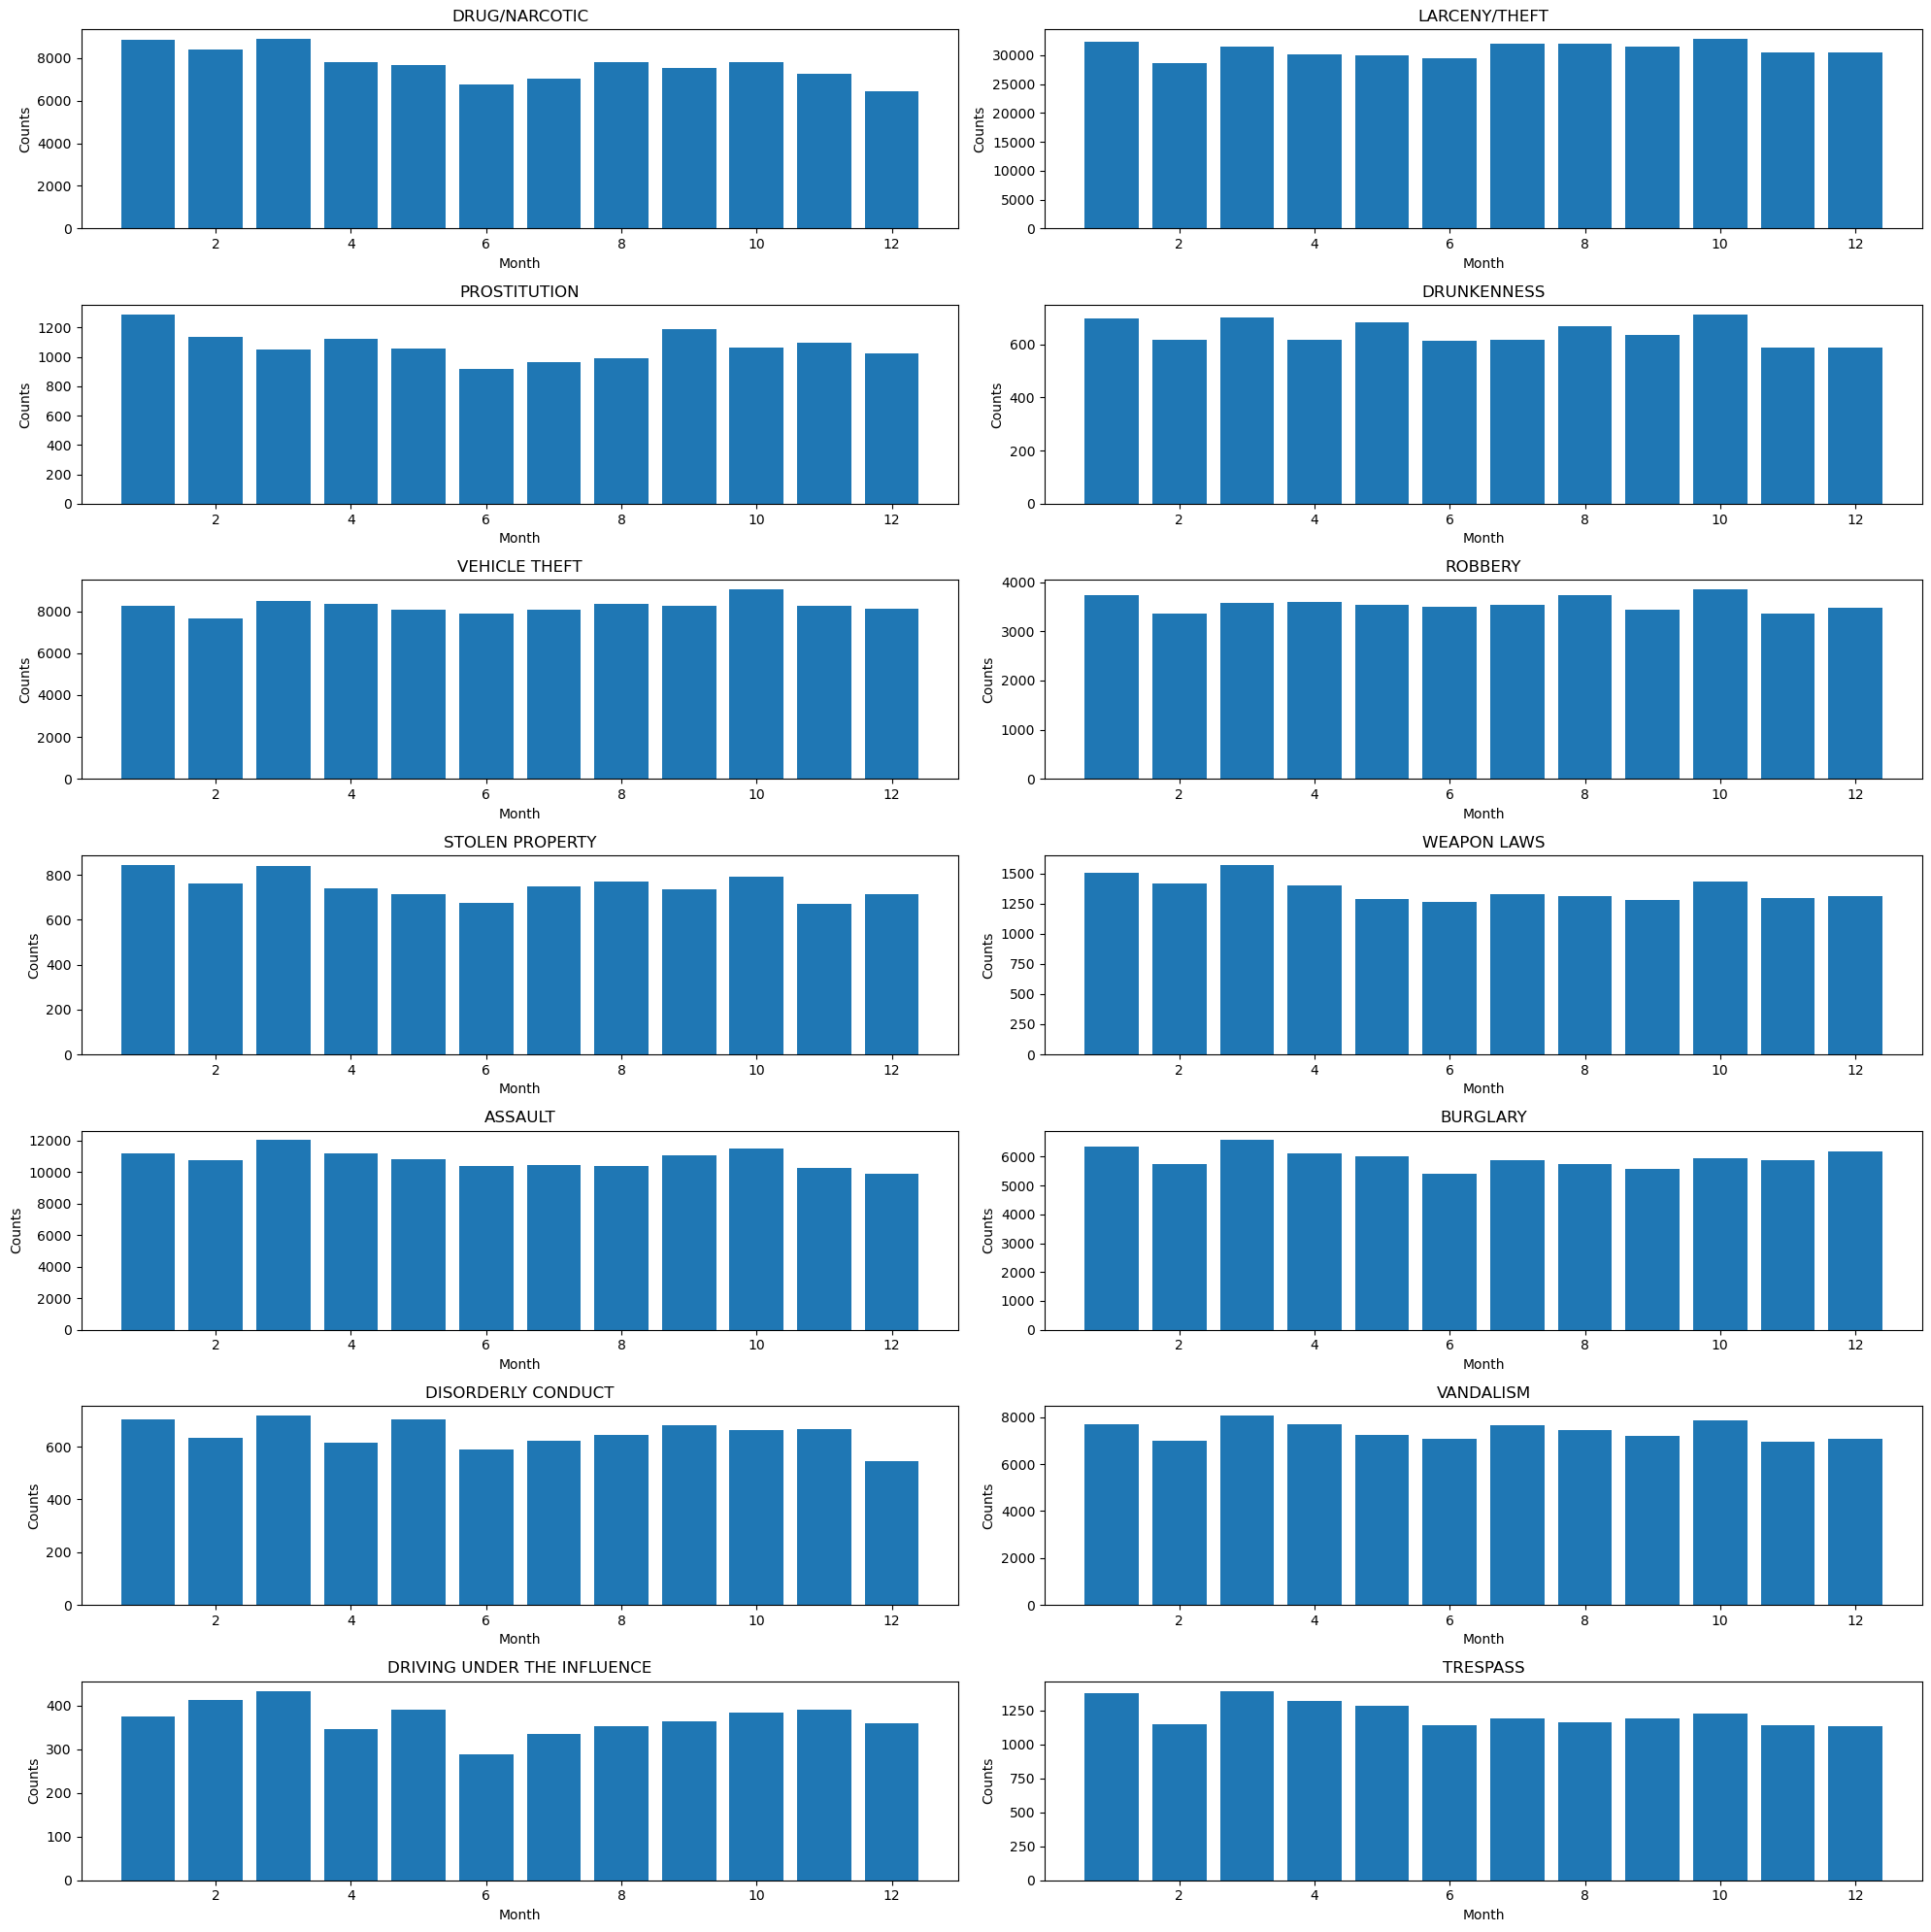

In [71]:
data["Date"] = pd.to_datetime(data["Date"])
month_counts = data["Date"].dt.month_name().value_counts()
print(month_counts)

nrows = 7
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
axes = axes.flatten()

for i,crime in enumerate(focuscrimes):
    crime_data = data[data["Category"] == crime]
    crime_month_counts = crime_data["Date"].dt.month.value_counts().sort_index()
    
    axes[i].bar(crime_month_counts.index,crime_month_counts.values)
    axes[i].set_title(crime)
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("Counts")

plt.tight_layout()
plt.show()

Some interesting points:
- A lot of the crimes go down in the summer months, see prostitution and drunk driving
- Disorderly conduct goes down in december (maybe christmas?)
- Stolen property is highest in January (again, maybe christmas)

### 24 hour cycle

C:\Users\maxhb\AppData\Local\Temp\ipykernel_42428\462439267.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Time"] = pd.to_datetime(data["Time"])


Time
0.0      84977
1.0      49554
2.0      41432
3.0      27014
4.0      19142
5.0      17011
6.0      25107
7.0      40873
8.0      61193
9.0      66768
10.0     71434
11.0     72879
12.0     99552
13.0     81092
14.0     83841
15.0     89737
16.0     93804
17.0    101512
18.0    105699
19.0     95158
20.0     86371
21.0     82507
22.0     86199
23.0     79288
Name: count, dtype: int64


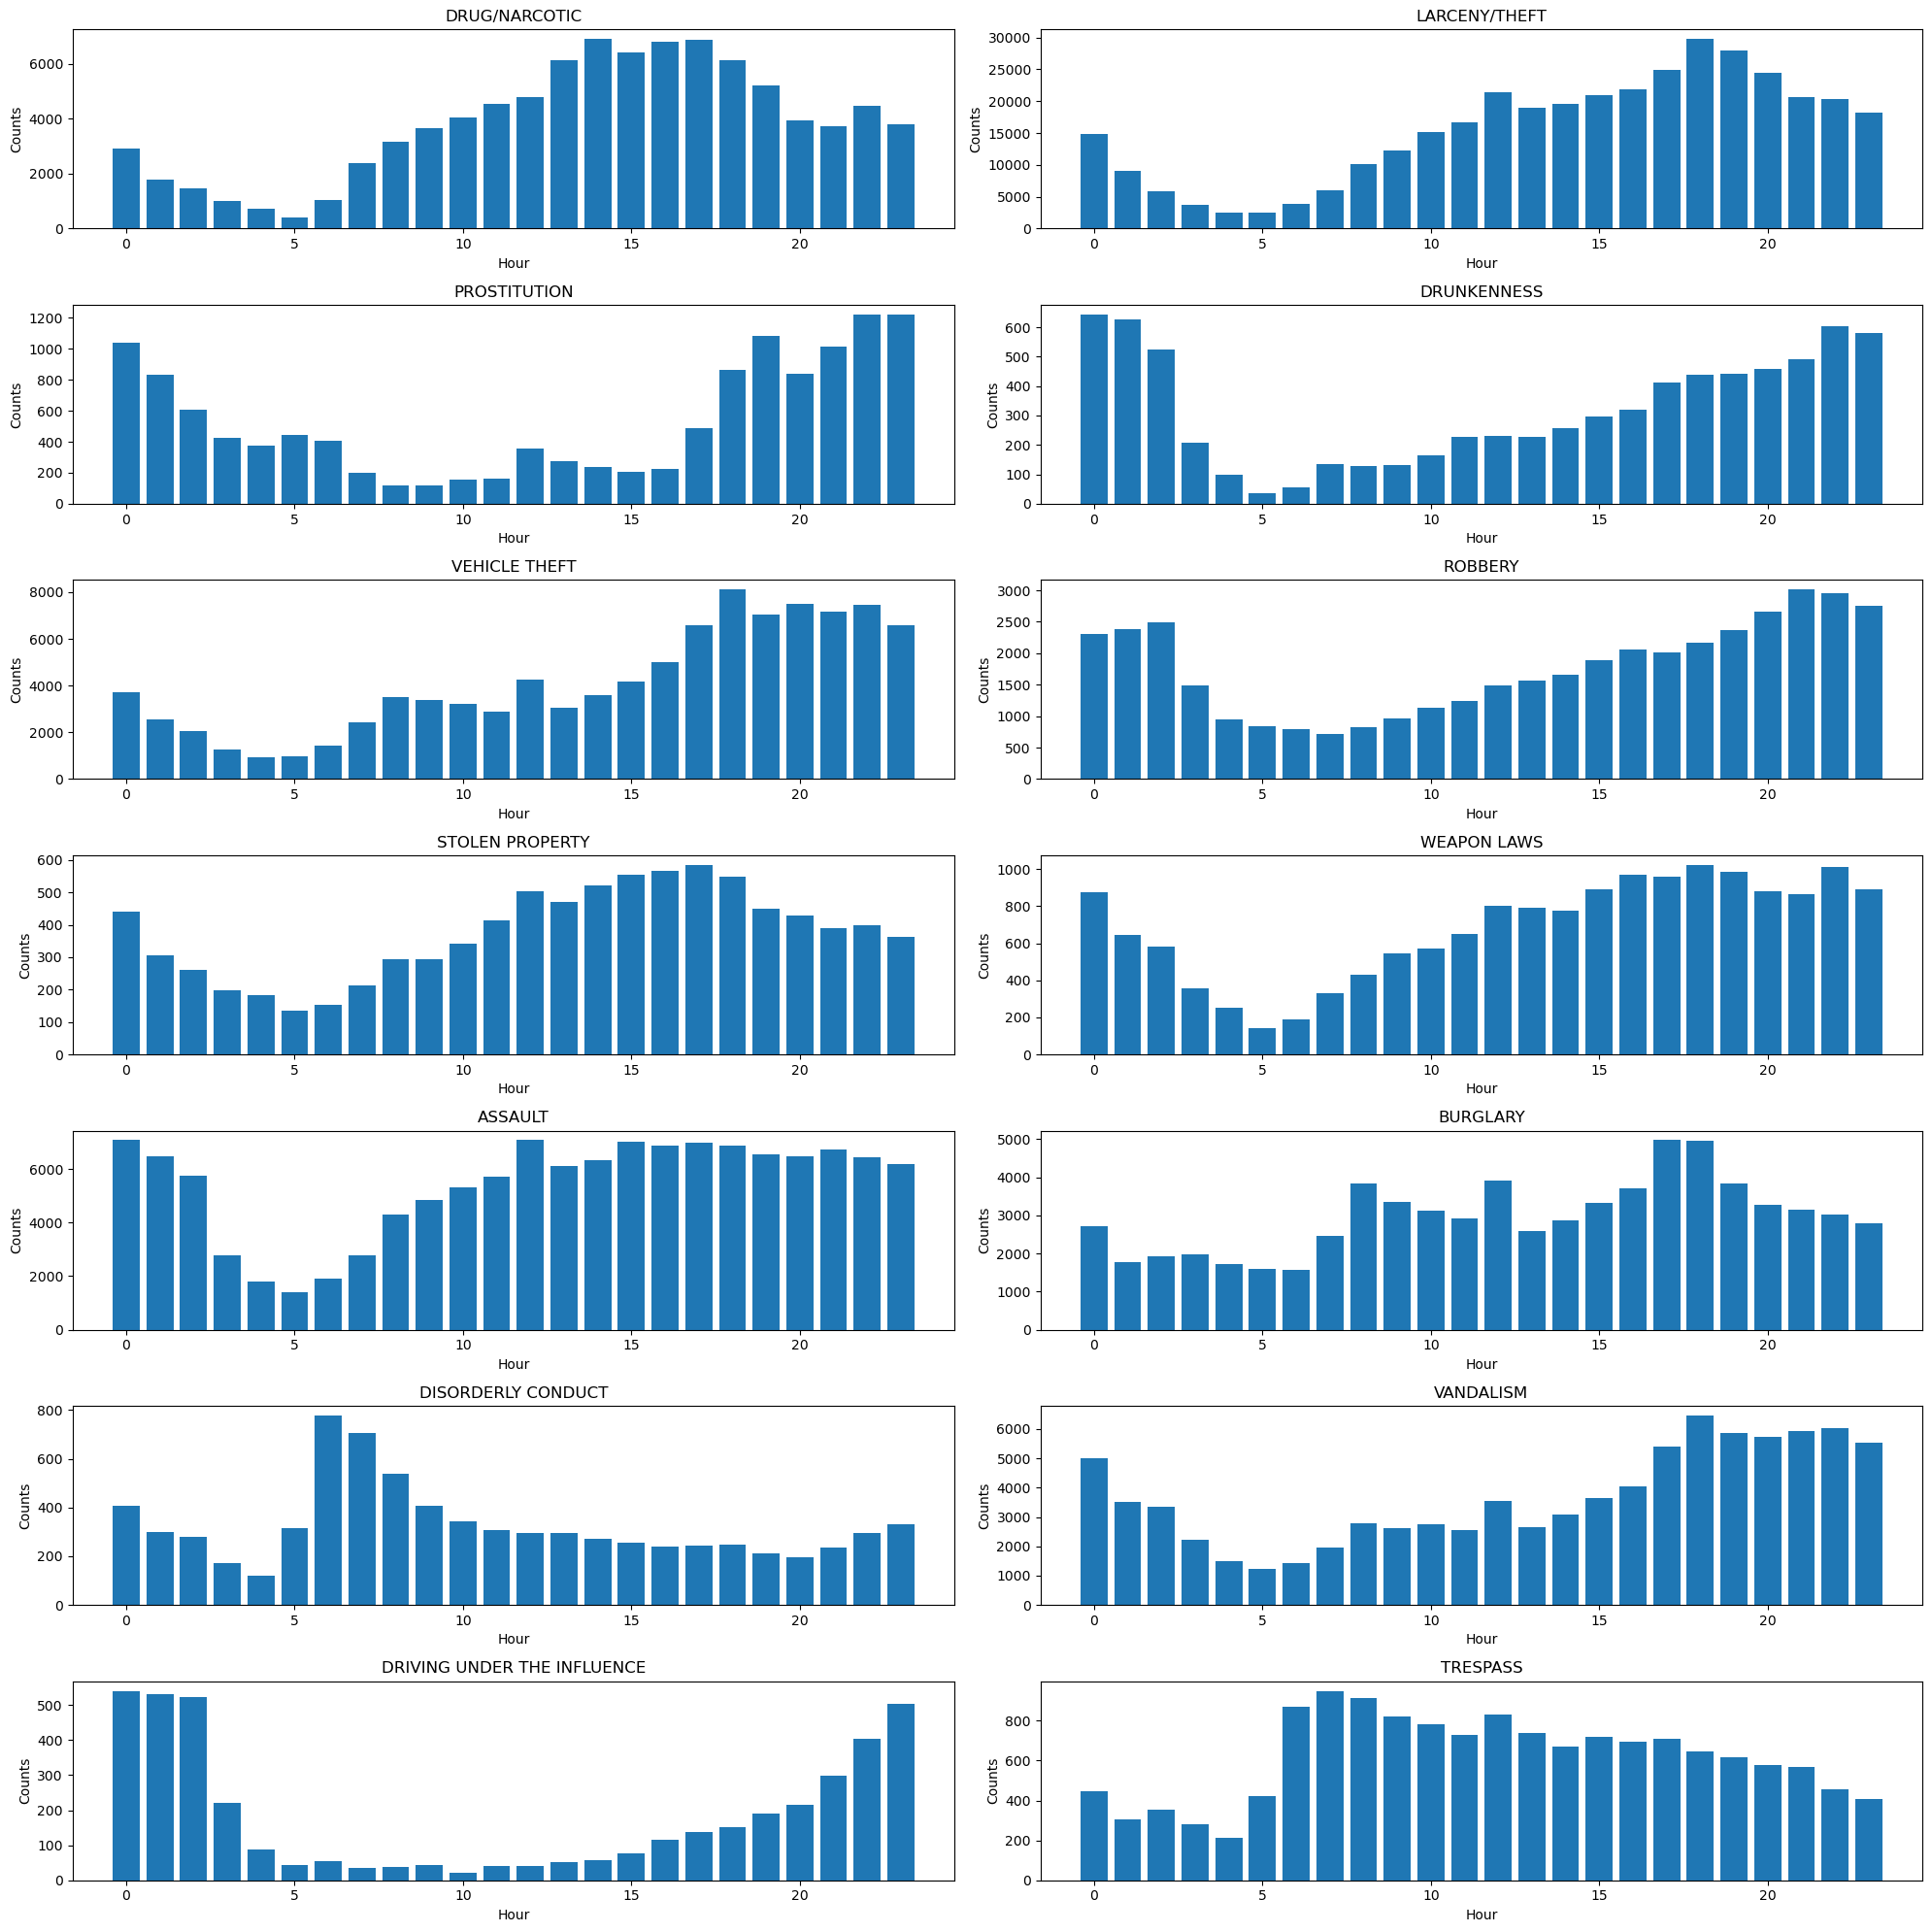

In [72]:
data["Time"] = pd.to_datetime(data["Time"])
hour_counts = data["Time"].dt.hour.value_counts().sort_index()
print(hour_counts)


nrows = 7
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
axes = axes.flatten()

for i,crime in enumerate(focuscrimes):
    crime_data = data[data["Category"] == crime]
    crime_hour_counts = crime_data["Time"].dt.hour.value_counts().sort_index()
    
    axes[i].bar(crime_hour_counts.index,crime_hour_counts.values)
    axes[i].set_title(crime)
    axes[i].set_xlabel("Hour")
    axes[i].set_ylabel("Counts")

plt.tight_layout()
plt.show()

### Weekly hour cycle

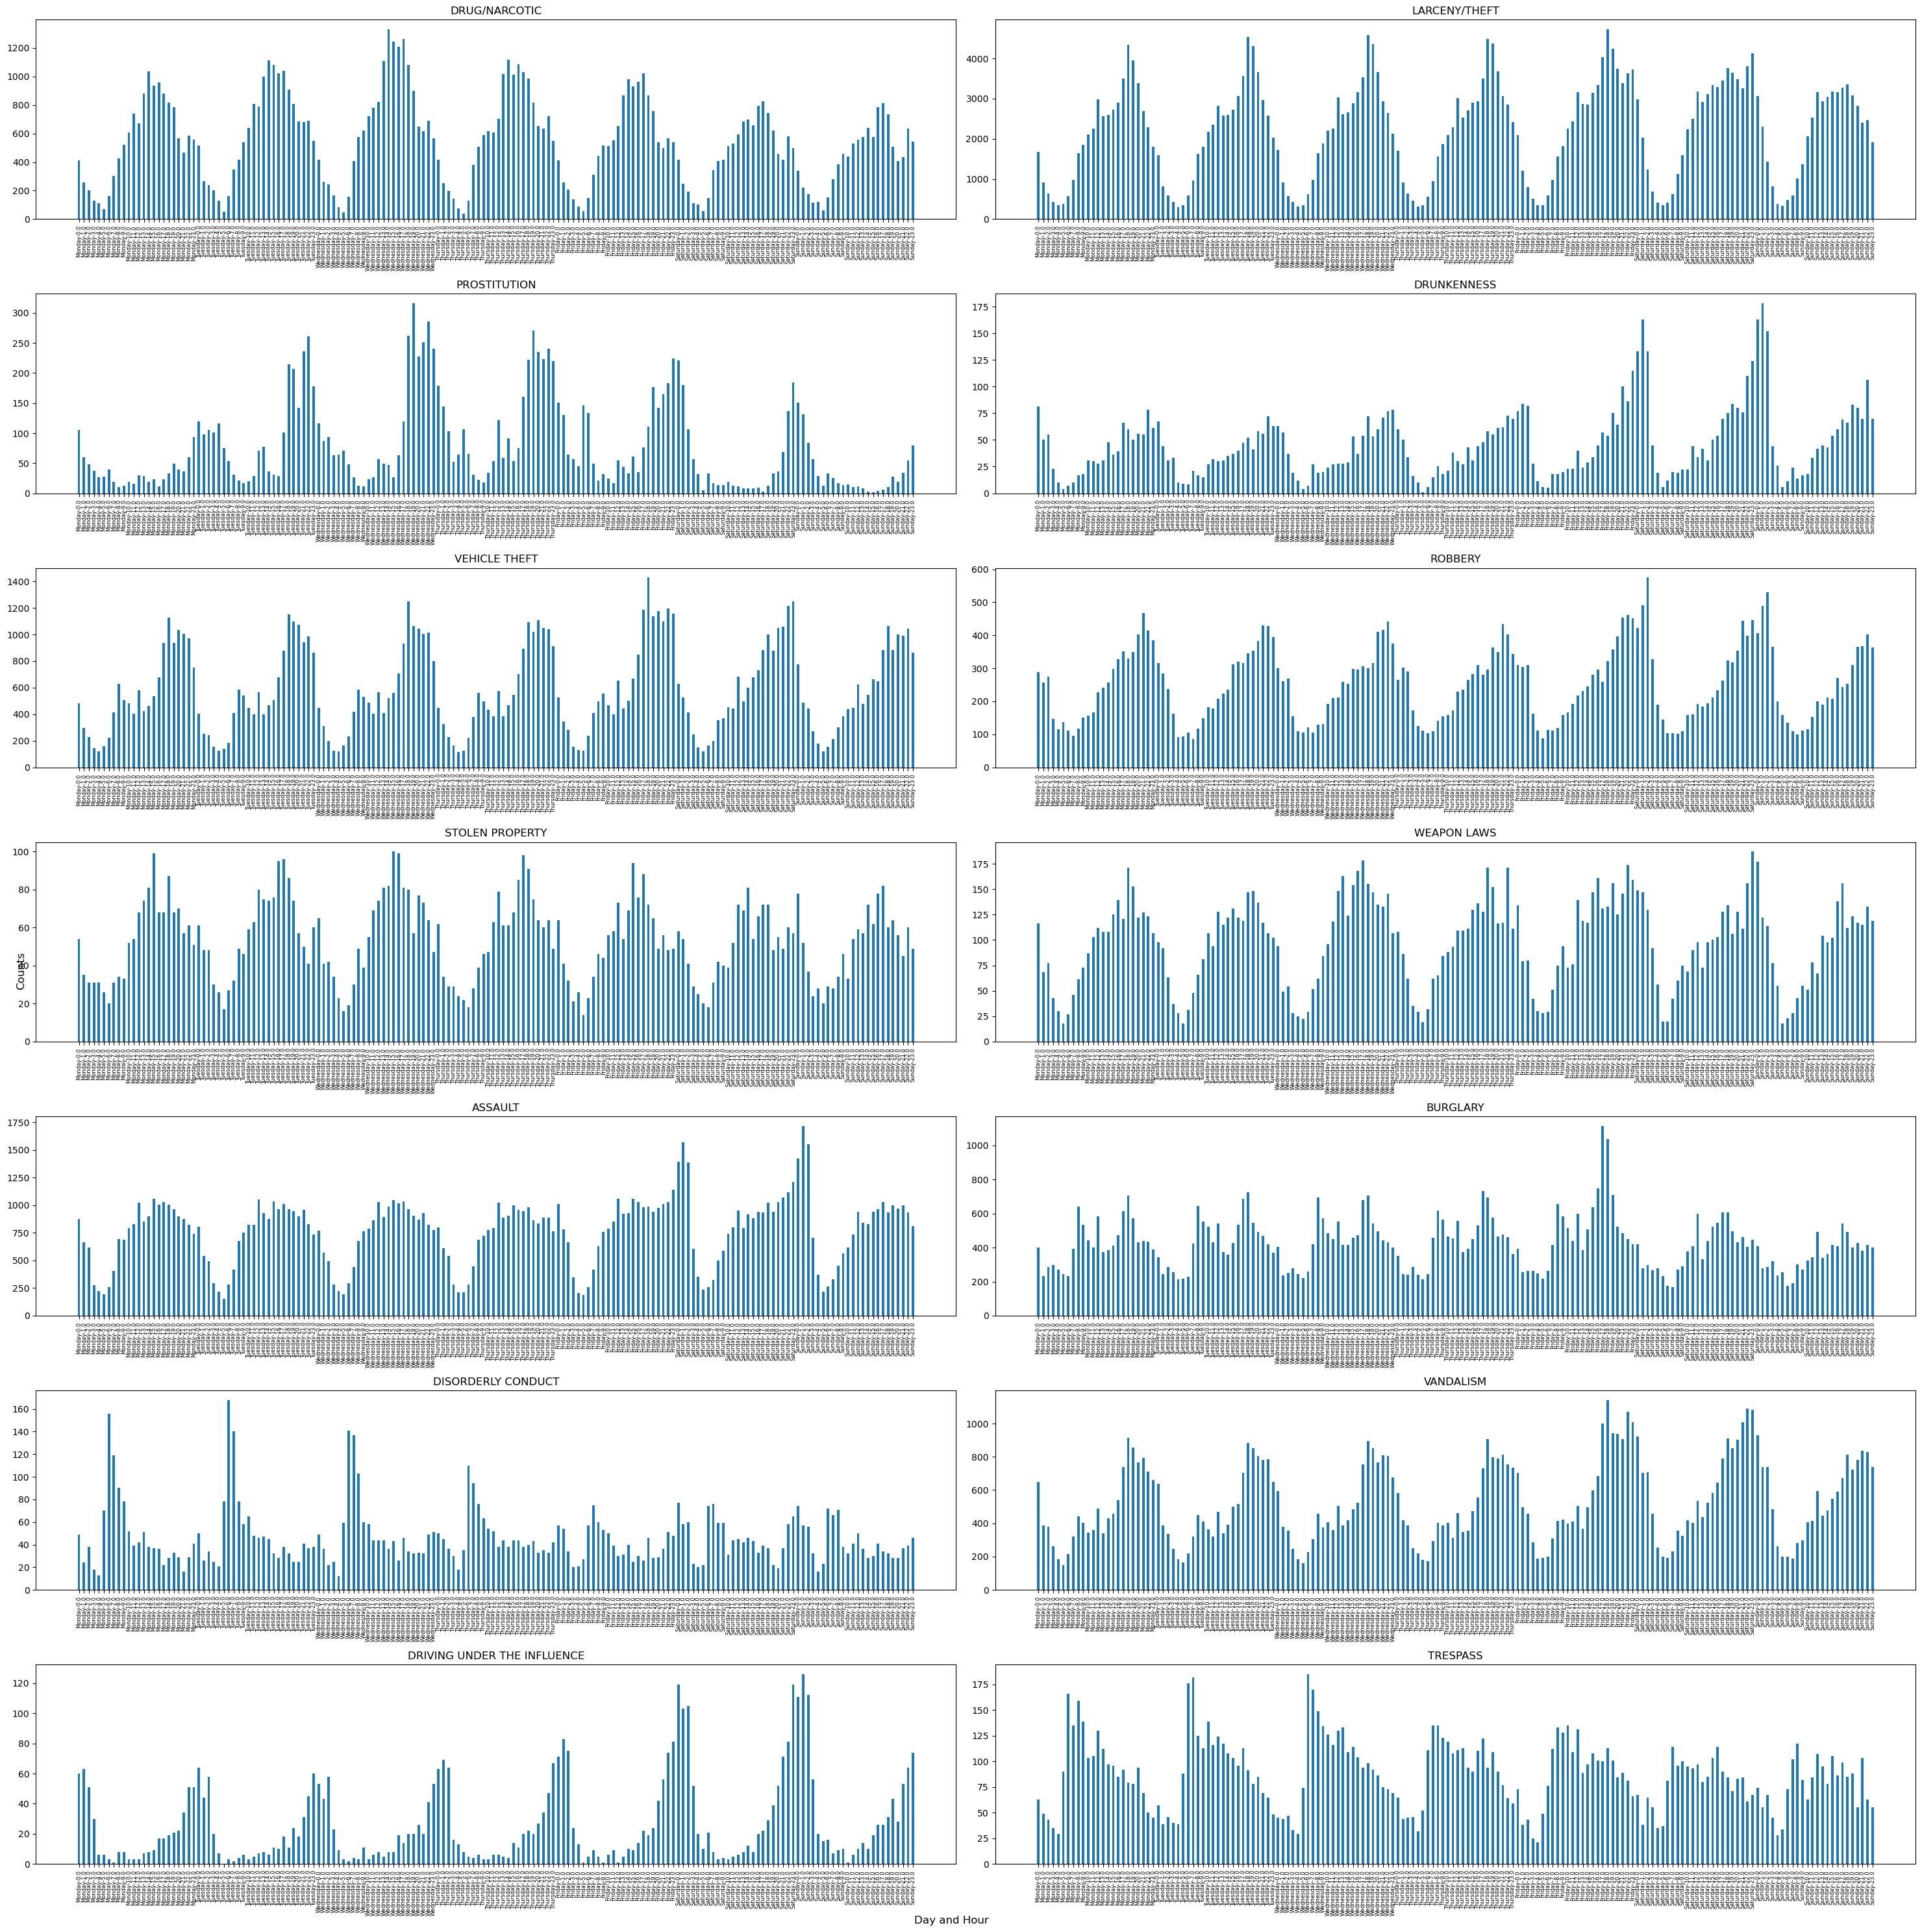

In [73]:
data["Time"] = pd.to_datetime(data["Time"])
data["Date"] = pd.to_datetime(data["Date"])
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

day_order = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

data["CombinedDateTime"] = data["DayOfWeek"].astype(str) + "-" + data["Time"].dt.hour.astype(str)

week_order = []

for day in day_order:
    for i in range(24):
        week_order.append(day + "-" + str(float(i)))
#For sorting the hours by day correctly
cat_type = CategoricalDtype(categories=week_order, ordered=True)
data["CombinedDateTime"] = data["CombinedDateTime"].astype(cat_type)

nrows = 7
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(30, 30))
axes = axes.flatten()

for i,crime in enumerate(focuscrimes):
    crime_data = data[data["Category"] == crime]
    crime_hour_week_counts = crime_data["CombinedDateTime"].value_counts().sort_index()
    
    axes[i].bar(crime_hour_week_counts.index,crime_hour_week_counts.values, width=0.5)
    axes[i].set_title(crime)
    axes[i].tick_params("x", labelrotation=90, labelsize=6)
fig.supxlabel("Day and Hour")
fig.supylabel("Counts")

plt.tight_layout()
plt.show()


## Creating nice plots

1. Make sure space between plots doesn't take over, so that they fill too much
2. Always add labels!!!
3. Subplots are usually nicer, than several outputs
4. Values should be readable, so for example, every second isn't needed, but every minute might show a plot better
5. Less is more, often plots don't need many fancy graphics
6. Zoom level can be misleading sometimes,sometimes its better to zoom out for better visualization
7. Colors can be used to highlight the point of a plot
8. Captions can also help guide a viewer through several plots
9. Fonts show that you have thought about what a plot looks like, and should be as readable as possible
10. Data to ink ratio should be low, not too high

## Exercise 4

### Calendar plots

In [74]:
import calplot


data["Date"] = pd.to_datetime(data["Date"], yearfirst=True)
data.set_index("Date", inplace=True)


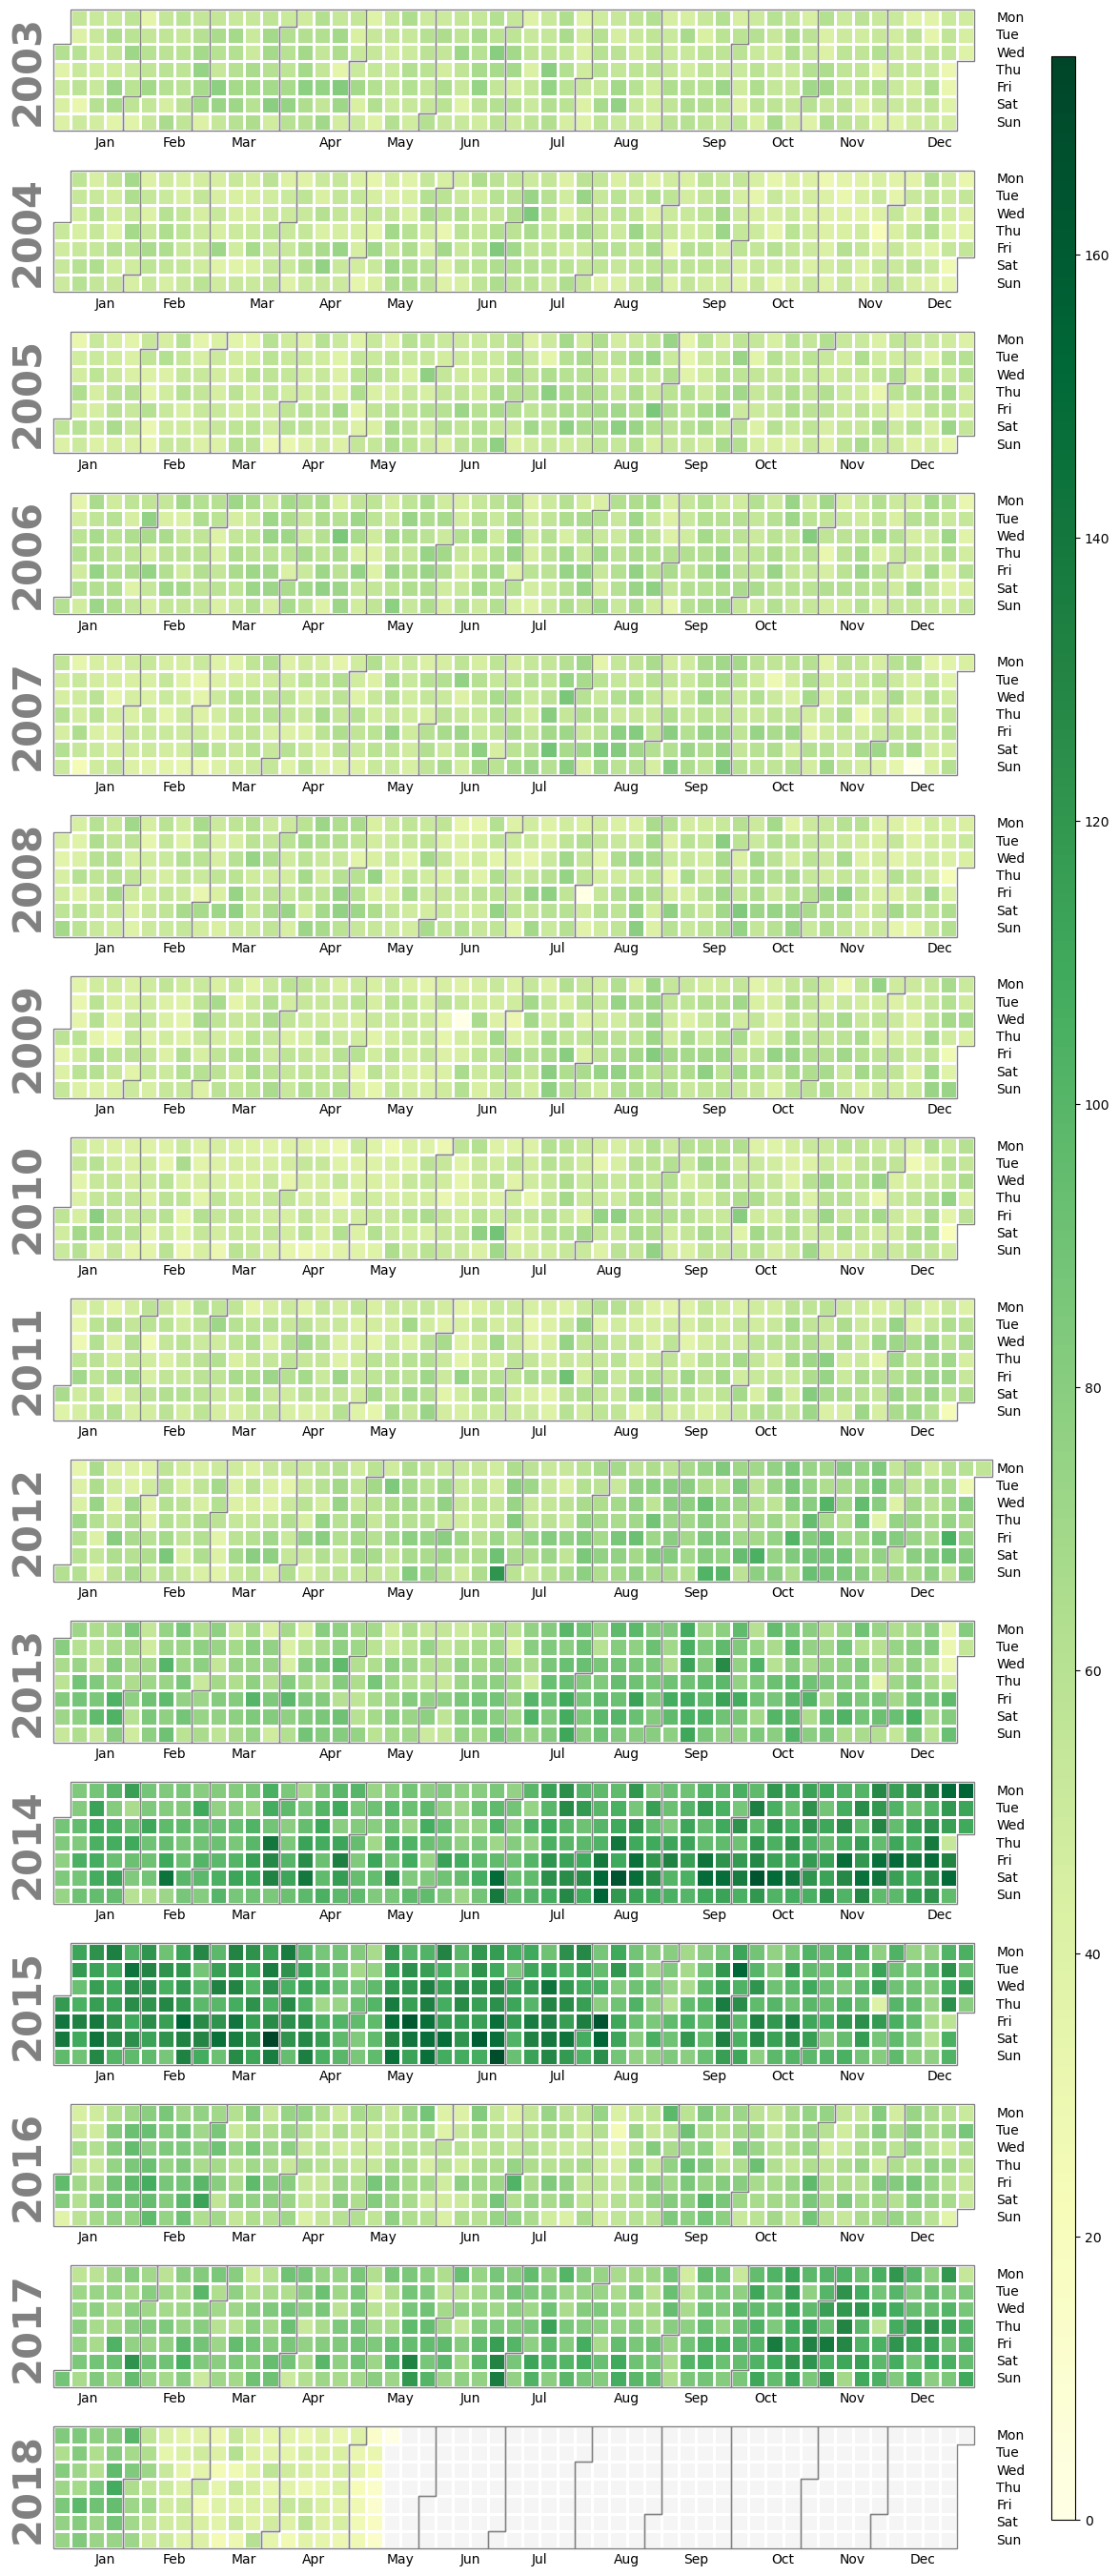

In [75]:

category_data = data[data["Category"] == "LARCENY/THEFT"]

category_counts = category_data.resample("D").size()

calplot.calplot(category_counts, cmap='YlGn', yearlabel_kws={'fontname':'sans-serif'})
plt.show()

### Polar bar charts

In [76]:
import numpy as np
data["Time"] = pd.to_datetime(data["Time"])
data["Hour"] = data["Time"].dt.hour

category_data = data[data["Category"] == "ROBBERY"]
hour_counts = category_data.groupby("Hour").size()


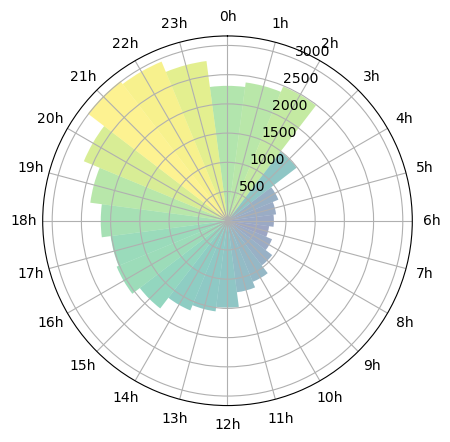

In [77]:
N = 24 #hours
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)  # Divide the circle into 24 parts
radii = hour_counts.values
width = np.pi / 12 * np.ones(N)  # Constant width
colors = plt.cm.viridis(radii / max(radii))  # Color proportional to the count

# Create polar plot
ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

# Customizing tick positions and labels
ax.set_xticks(theta)  # Set tick positions
hour_labels = [f"{i}h" for i in range(N)]  # Generate labels from 0h to 23h
ax.set_xticklabels(hour_labels)  # Apply custom labels

# Additional customization for readability
ax.set_theta_zero_location('N')  # Midnight at top
ax.set_theta_direction(-1)  # Hours increase clockwise

plt.show()



### Time series

In [78]:
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
data["Date"] = pd.to_datetime(data["Date"])
data.head()

C:\Users\maxhb\AppData\Local\Temp\ipykernel_42428\4156690223.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")


,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220.0,3074.0,ROBBERY,"ROBBERY, BODILY FORCE",Monday,2004-11-22,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358.0,7021.0,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2005-10-18,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309.0,7021.0,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2004-02-15,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431.0,26030.0,ARSON,ARSON,Friday,2011-02-18,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080.0,4134.0,ASSAULT,BATTERY,Sunday,2010-11-21,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


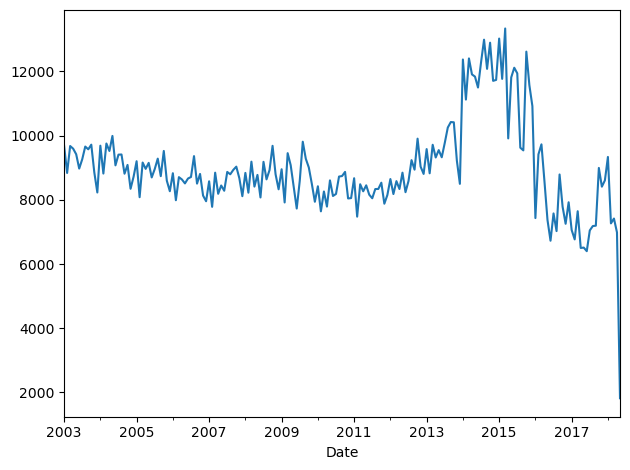

In [79]:
data.set_index("Date",inplace=True)
data.resample("M").size().plot()
plt.tight_layout()
plt.show()

# Exercise 5: Visualizing Patterns in Data

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])


C:\Users\maxhb\AppData\Local\Temp\ipykernel_42428\3244612584.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")


Number of crimes in each district:  PdDistrict
SOUTHERN      305554
MISSION       224693
NORTHERN      207413
CENTRAL       173206
BAYVIEW       160049
TENDERLOIN    146499
INGLESIDE     142132
TARAVAL       121170
PARK           93527
RICHMOND       87900
Name: count, dtype: int64


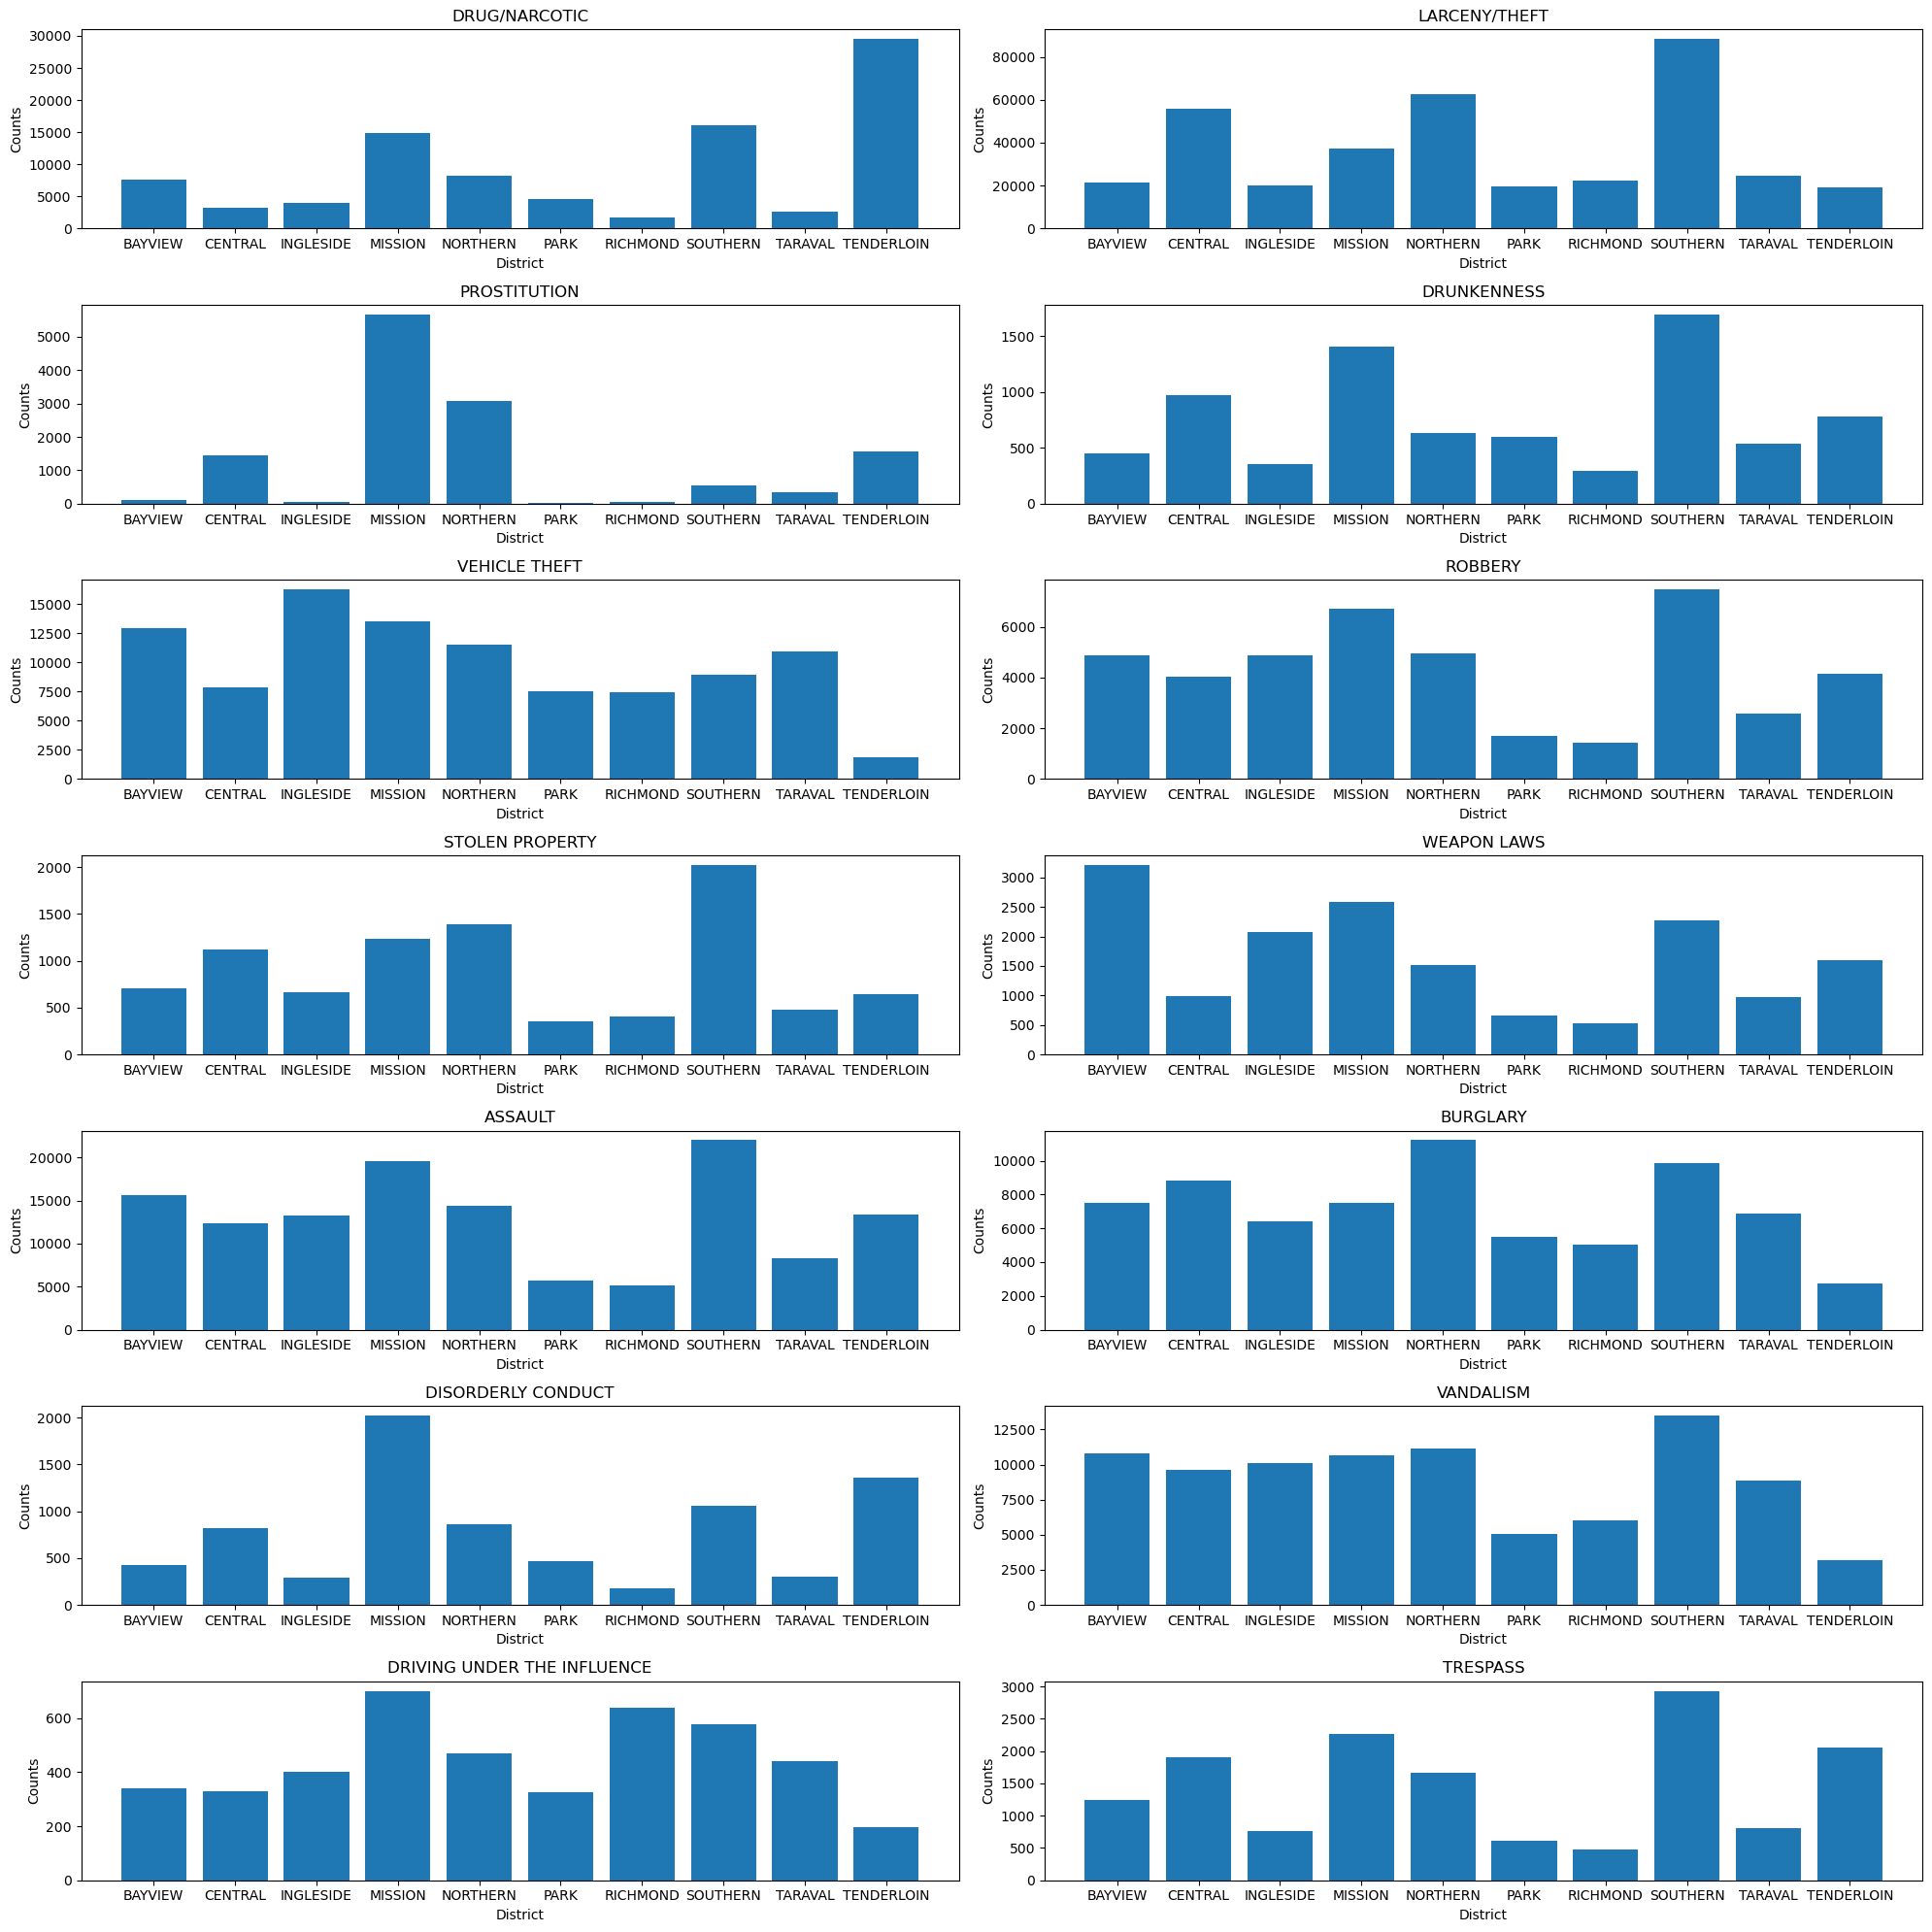

In [81]:
districts = data["PdDistrict"].dropna().unique()

print("Number of crimes in each district: ", data["PdDistrict"].value_counts())

nrows = 7
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
axes = axes.flatten()

for i,crime in enumerate(focuscrimes):
    crime_data = data[data["Category"] == crime]
    crime_district_counts = crime_data["PdDistrict"].value_counts().sort_index()
    
    axes[i].bar(crime_district_counts.index,crime_district_counts.values)
    axes[i].set_title(crime)
    axes[i].set_xlabel("District")
    axes[i].set_ylabel("Counts")

plt.tight_layout()
plt.show()


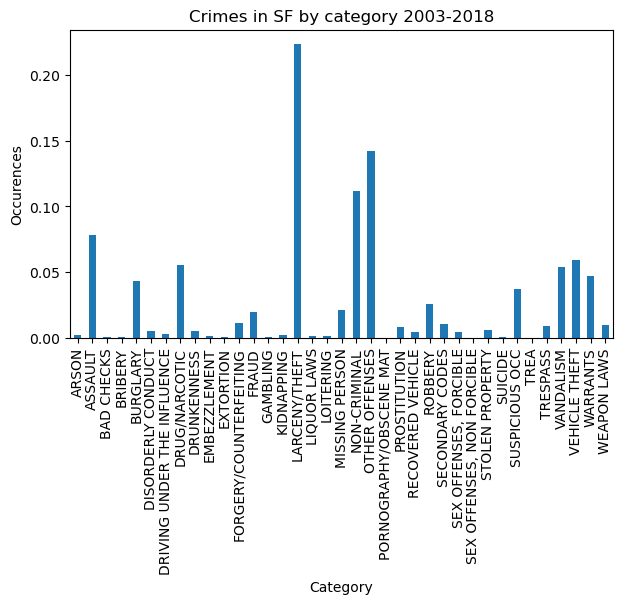

In [82]:
category_counts = data["Category"].value_counts(normalize=True).sort_index()

plt.figure(figsize=(7,4))
category_counts.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Occurences")
plt.title("Crimes in SF by category 2003-2018")
plt.show()



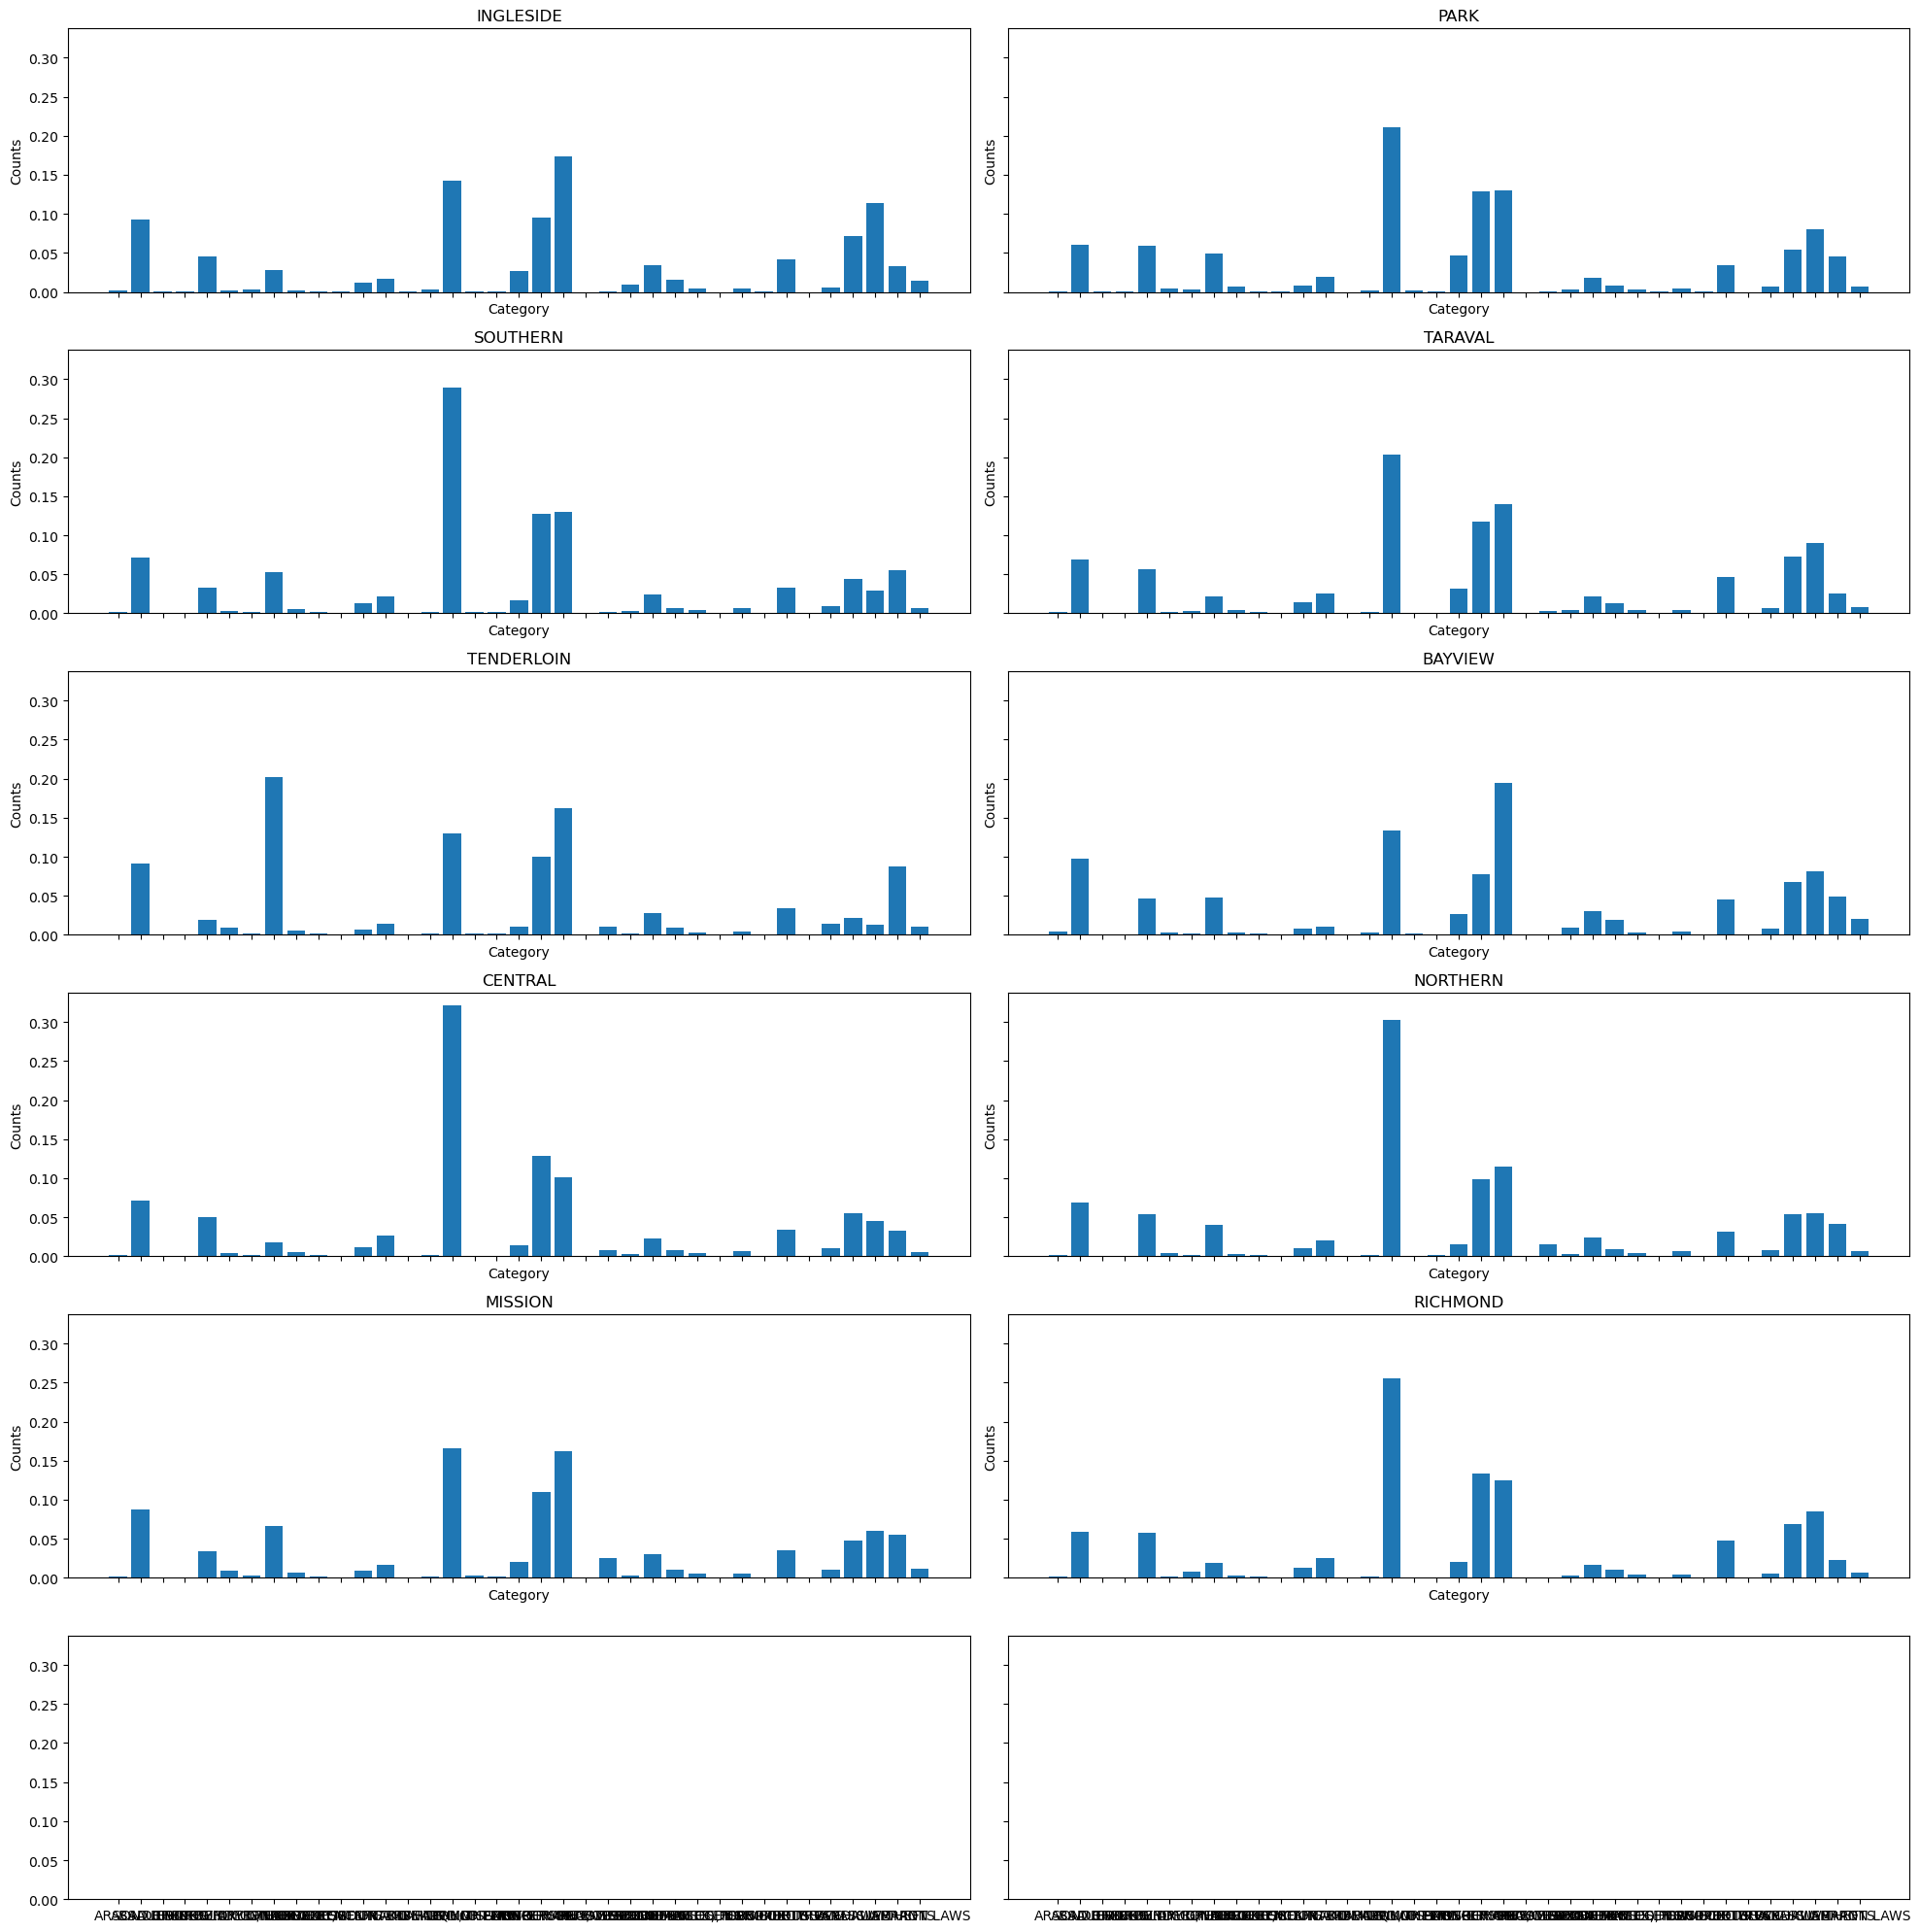

In [83]:
nrows = 6
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20), sharey=True, sharex=True)
axes = axes.flatten()

for i,district in enumerate(districts):
    crime_data = data[data["PdDistrict"] == district]
    crime_district_counts = crime_data["Category"].value_counts(normalize=True).sort_index()
    
    axes[i].bar(crime_district_counts.index,crime_district_counts.values)
    axes[i].set_title(district)
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Counts")
    axes[i].tick_params('x',labelrotation=90)

plt.tight_layout()
plt.show()


C:\Users\maxhb\AppData\Local\Temp\ipykernel_42428\675614808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Category"] = pd.Categorical(filtered_data["Category"], categories=focuscrimes)


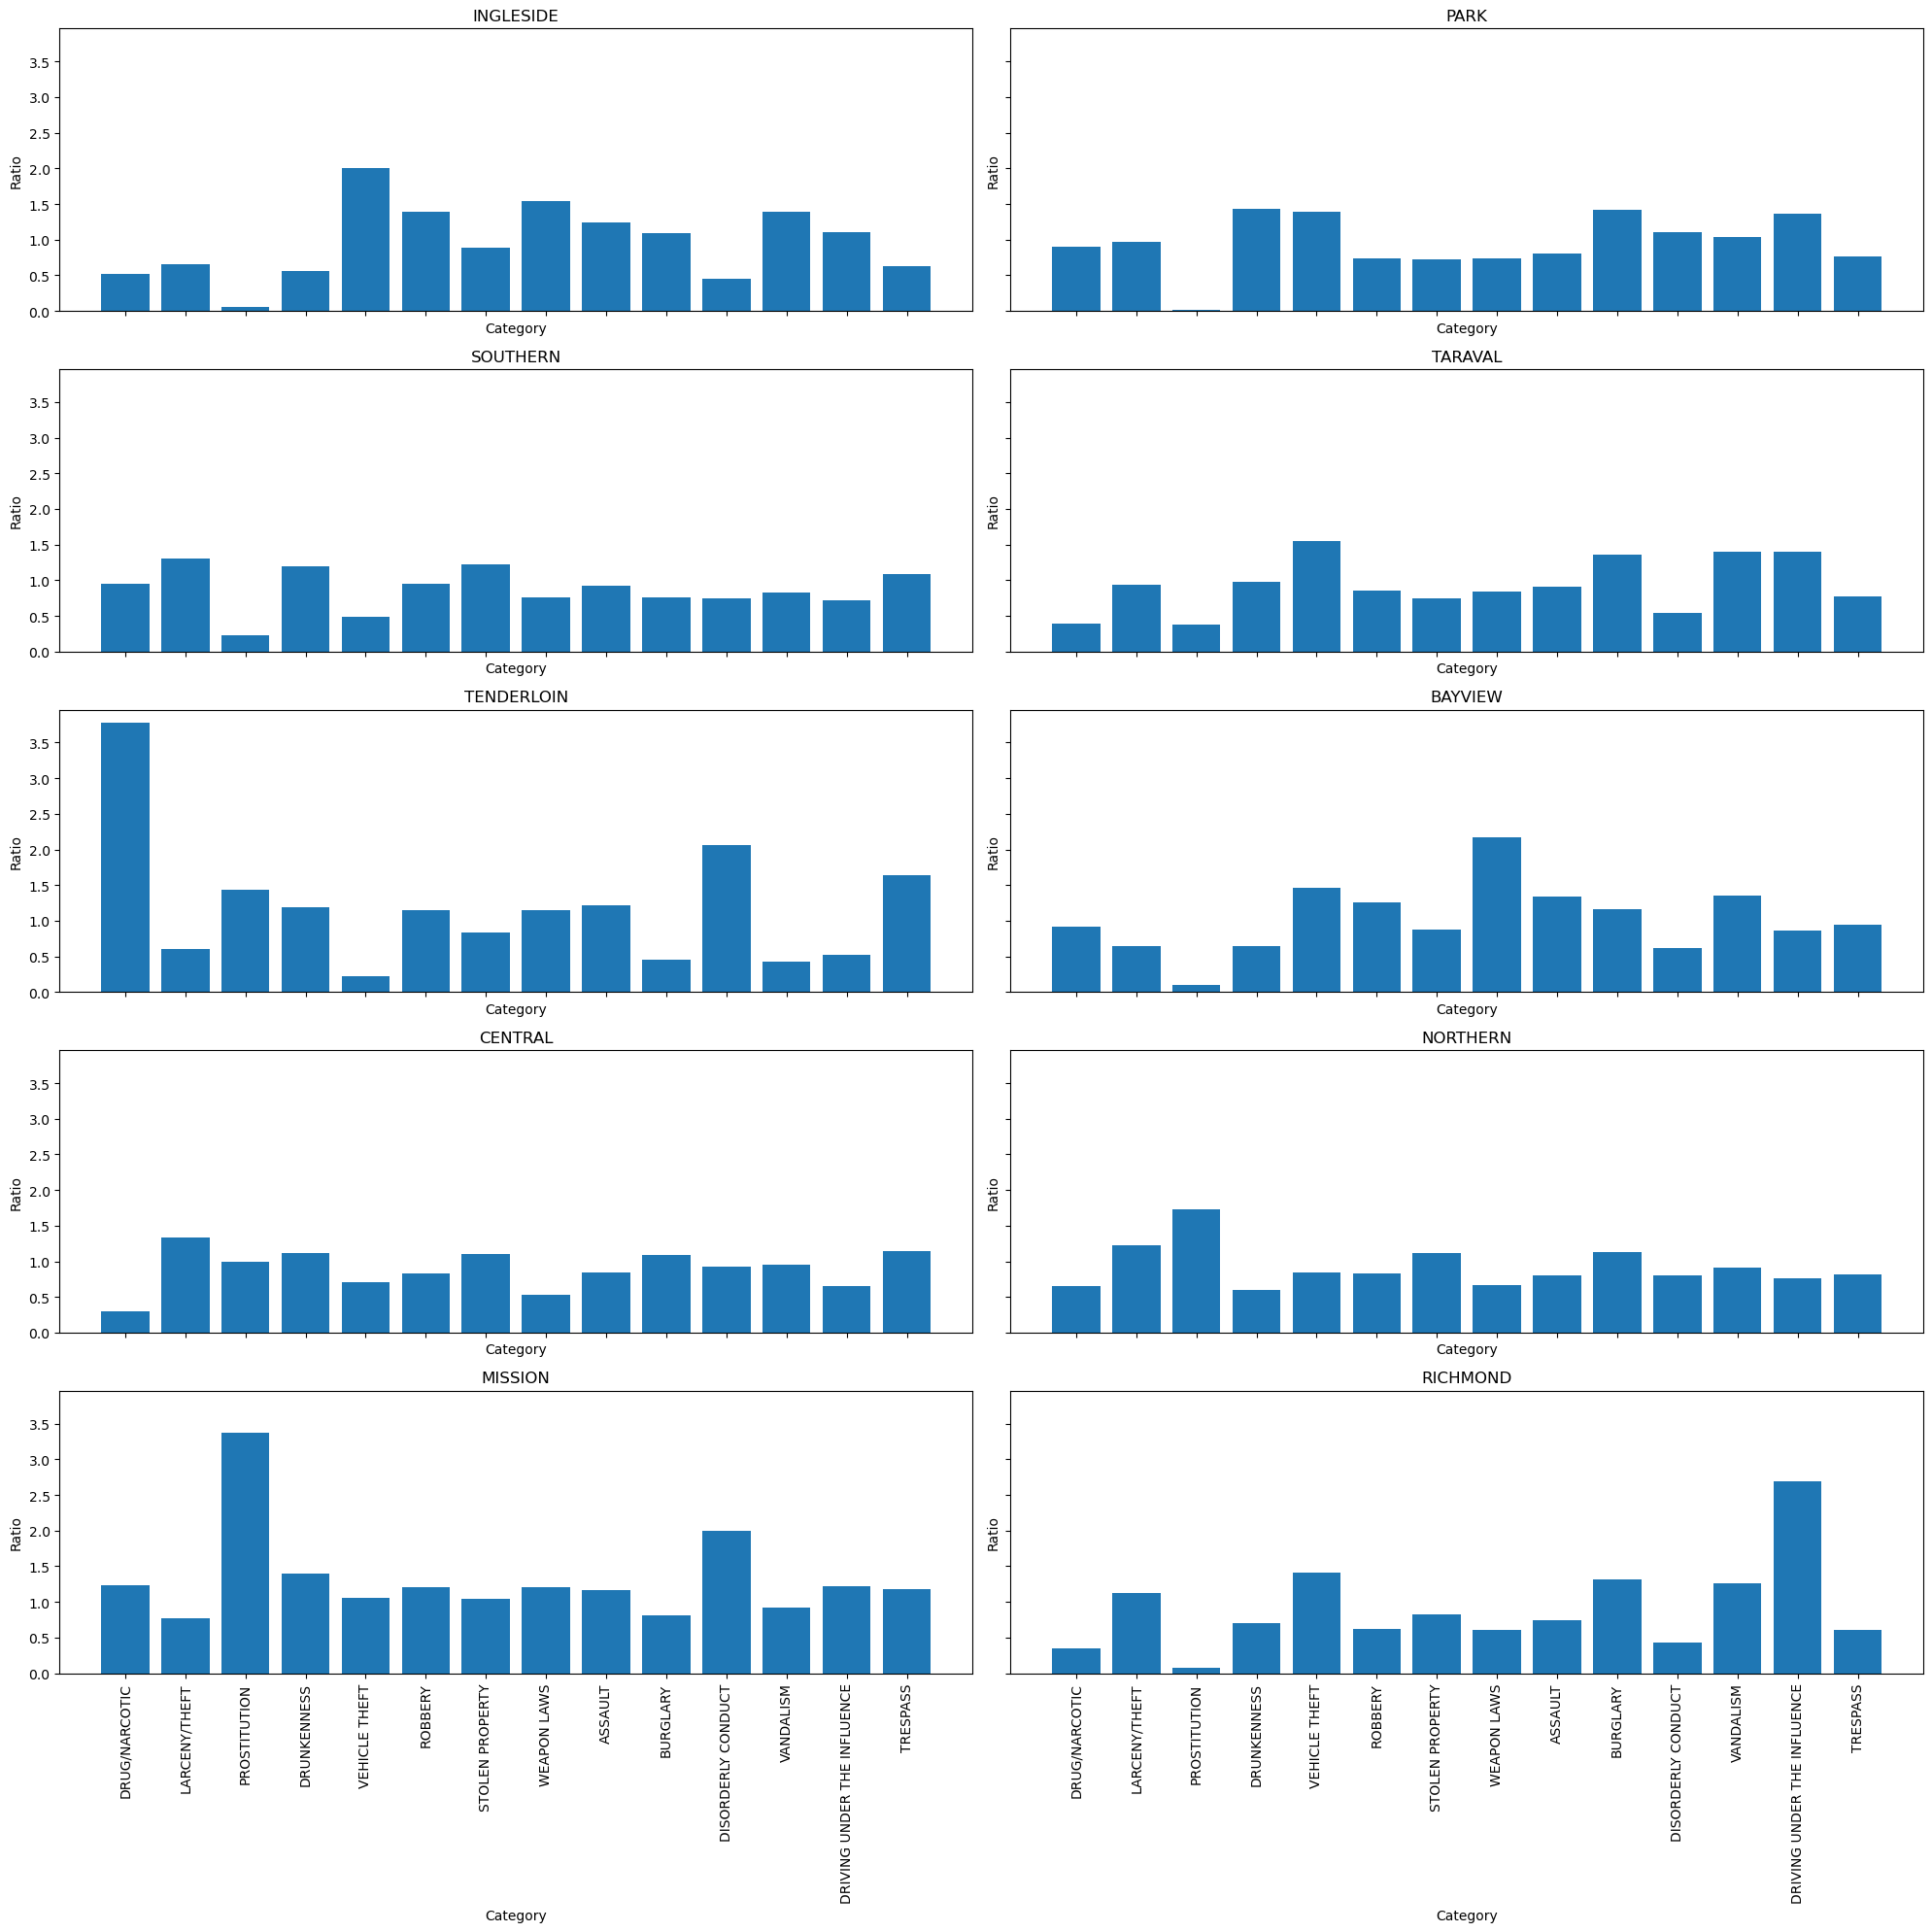

In [84]:
data['Category'] = data['Category'].fillna('Unknown')
districts = data["PdDistrict"].dropna().unique()
filtered_data = data[data['Category'].isin(focuscrimes)]
filtered_data["Category"] = pd.Categorical(filtered_data["Category"], categories=focuscrimes)
category_counts = filtered_data["Category"].value_counts(normalize=True).sort_index()

nrows = 5
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20), sharey=True, sharex=True)
axes = axes.flatten()

for i,district in enumerate(districts):
    crime_data = filtered_data[filtered_data["PdDistrict"] == district]
    crime_district_counts = crime_data["Category"].value_counts(dropna=False,normalize=True).reindex(focuscrimes,fill_value=0)
    
    axes[i].bar(crime_district_counts.index,crime_district_counts.values/category_counts.sort_index().values)
    axes[i].set_title(district)
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Ratio")
    axes[i].tick_params('x',labelrotation=90)

plt.tight_layout()
plt.show()


Richmond:
- Known for its parks
- Many ethnic Russians and Chinese here
- Plot shows high probability for driving under the influence here

Mission:
- Primarily Hispanic and Latino area
- Been gentrified somewhat
- Plot shows high probability for Prostitution

Tenderloin:
- Known for being seedy and having more crime than the rest of SF
- Plot shows high probability for drug/narcotics crime, which makes sense

Out of these three, Richmond, sounds and looks like the "best" district to live in. But either Central or Bayview look like the districts with overall lowest probability of crimes